In [31]:
%matplotlib inline

import os

import pandas as pd
import numpy as np
import keras
import tensorflow as tf

import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input,Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adam
from tensorflow.keras.losses import MeanSquaredError, CategoricalCrossentropy

In [4]:
##### 선형회귀 - 𝑦=𝑤_1𝑥+𝑤_0

# 1. 입력층 구성
inputs = Input(shape=(1,), name='inputs')

# 2. 출력층 구성
dense_layer = Dense(units=1, name='output')

# 3. 입력층과 출력층 연결
output = dense_layer(inputs)

# 4. 모델로 구성
model = Model(inputs, output, name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
#### 선형회귀 - y=w_0+w_1x_1+w_2x_2+w_3x_3

# 1. 입력층 구성
inputs = Input(shape=(3,), name='inputs')

# 2. 출력층 구성
dense_layer = Dense(units=1, use_bias=False, name='output') # w_0을 없애는 것

# 3. 입력층과 출력층 연결
output = dense_layer(inputs)

# 4. 모델로 구성
model = Model(inputs, output, name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 3)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [9]:
#### 시그모이드 함수 / 0~1의 확률값 / 입력값 3개, 출력값 2개

# 1. 입력층 구성
inputs = Input(shape=(3,), name='inputs')

# 2. 출력층 구성
dense_layer = Dense(units=1, activation='sigmoid', name='output') # 활성화 함수 : activation
# 3. 입력층과 출력층 연결
output = dense_layer(inputs)

# 4. 모델로 구성
model = Model(inputs, output, name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 3)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [12]:
### 입력 3개, 은닉 3개, 최종 1개

# 1. 입력층 구성
inputs = Input(shape=(3,), name='inputs')

# 2. 은닉층 구성
hidden_layer = Dense(units=3, activation='sigmoid', name='hidden')
hidden = hidden_layer(inputs)

# 3. 출력층 구성
output_layer = Dense(units=1, name='output')
output = output_layer(hidden)

# 4. 모델 구성
model = Model(inputs, output, name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 3)]               0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 16
Trainable params: 16
Non-trainable params: 0
_________________________________________________________________


In [15]:
inputs = Input(shape=(1,), name='inputs')

dense_layer = Dense(units=1, name='output')

output = dense_layer(inputs)

model = Model(inputs, output, name='model')

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [19]:
dense_layer.get_weights() # w1, w0 = 임의로 지정한 값

[array([[-0.11697149]], dtype=float32), array([0.], dtype=float32)]

In [22]:
x = np.array([[1.]],np.float32)
model.predict(x)

array([[-0.11697149]], dtype=float32)

In [23]:
x = np.array([[2.]],np.float32)
model.predict(x)

array([[-0.23394299]], dtype=float32)

In [30]:
x = np.array([[1.],[2.]],np.float32) # 첫번째 축은 처리할 데이터 배치(Batch)의 수, 두번째 축은 데이터 내 입력 변수의 갯수
print(x.shape)
model.predict(x)

(2, 1)


array([[-0.11697149],
       [-0.23394299]], dtype=float32)

In [40]:
movie_df = pd.DataFrame([
    [8759, 487],
    [10132,612],
    [12078,866],
    [16430,1030]],
    columns=["nums_want_to_see","nums_audience"])
movie_df.index = ["마션","킹스맨","캡틴아메리카","인터스텔라"]
movie_df

,nums_want_to_see,nums_audience
마션,8759,487
킹스맨,10132,612
캡틴아메리카,12078,866
인터스텔라,16430,1030


In [41]:
inputs = Input(shape=(1,), name='inputs')
dense_layer = Dense(units=1, name='output')
output = dense_layer(inputs)
model = Model(inputs, output, name='model')
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 1)]               0         
_________________________________________________________________
output (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [42]:
y_pred = model.predict(movie_df['nums_want_to_see'])
movie_df['prediction'] = y_pred
movie_df

,nums_want_to_see,nums_audience,prediction
마션,8759,487,8885.228516
킹스맨,10132,612,10278.015625
캡틴아메리카,12078,866,12252.059570
인터스텔라,16430,1030,16666.777344


In [43]:
# 학습이 전혀 되지 않았을 때의 Weight
model.get_weights()

[array([[1.0144113]], dtype=float32), array([0.], dtype=float32)]

In [45]:
loss = MeanSquaredError()
optimizer = SGD(2e-10)
model.compile(loss=loss, optimizer=optimizer)

In [55]:
history = model.fit(x=movie_df['nums_want_to_see'], 
                    y=movie_df['nums_audience'], 
                    epochs=1000, verbose=0)

In [56]:
y_pred = model.predict(movie_df['nums_want_to_see'])

movie_df['prediction'] = y_pred
movie_df

,nums_want_to_see,nums_audience,prediction
마션,8759,487,556.986267
킹스맨,10132,612,644.295593
캡틴아메리카,12078,866,768.042114
인터스텔라,16430,1030,1044.786499


In [59]:
model.get_weights()

[array([[0.06359018]], dtype=float32), array([-7.801453e-05], dtype=float32)]

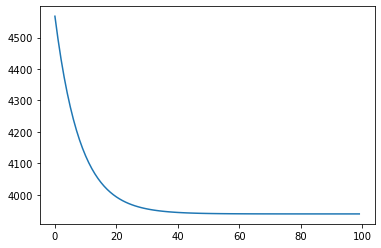

In [52]:
plt.plot(history.history['loss'])
plt.show()

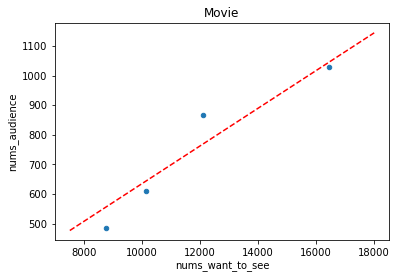

In [60]:
pred_inputs = np.arange(7500,18000)
pred_outputs = model.predict(pred_inputs[:,None])
movie_df.plot(x='nums_want_to_see',y='nums_audience',
              kind='scatter', title="Movie")
plt.plot(pred_inputs, pred_outputs, 'r--')
plt.show()